In [1]:
%matplotlib notebook

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import os
import webbrowser
import io
import matplotlib 

In [3]:
# Save file path to variable
retail_history_csv = "Datasets/EstUS_Retail_Trade_E-commercehistory.csv"
US_totalrev_2018_2017_csv = "Datasets/US_Retail_Trade_Sales_2018_2017.csv"

In [4]:
# Read with pandas
retail_history_df = pd.read_csv(retail_history_csv)
retail_history_df.head()

,NAICS Code,Unnamed: 1,2018,Unnamed: 3,2017r,Unnamed: 5,2016r,Unnamed: 7,2015r,Unnamed: 9,...,2002,Unnamed: 35,2001,Unnamed: 37,2000,Unnamed: 39,1999,Unnamed: 41,1998,Unnamed: 43
0,NaN,Kind of Business,Total,E-commerce,Total,E-commerce,Total,E-commerce,Total,E-commerce,...,Total,E-commerce,Total,E-commerce,Total,E-commerce,Total,E-commerce,Total,E-commerce
1,NaN,Total Retail Trade ………………………...……………………………………,"5,269,468","519,635","5,053,151","458,916","4,852,958","397,252","4,725,993","346,188",...,"3,128,552","44,623","3,062,268","34,260","2,983,276","27,608","2,803,090","14,490","2,581,762","4,984"
2,441.0,Motor vehicle and parts dealers …………………………...…...,"1,191,321","35,348","1,172,367","32,106","1,140,614","30,739","1,094,112","30,145",...,"818,811","7,059","815,579","5,271","796,210","4,090","764,204","1,704","688,415",382
3,442.0,Furniture and home furnishings stores ……………………...,"116,895","1,533","113,035","1,279","110,404","1,081","106,570",996,...,"94,438",S,"91,484",S,"91,170",S,"84,294",S,"77,412",S
4,443.0,Electronics and appliance stores …………………………......,"100,205","2,056","98,570","2,113","99,043","2,069","103,658","1,930",...,"91,208",NaN,"88,493",NaN,"90,422",NaN,"87,363",NaN,"82,731",NaN


In [5]:
# Clean up DF
retail_history_df = retail_history_df.rename(columns={"Unnamed: 1": "Kind of Business",
                                 "2018": "2018 Total",
                                 "Unnamed: 3": "2018 Ecommerce Total",
                                 "2017r": "2017 Total",
                                 "Unnamed: 5": "2017 Ecommerce Total",
                                 "2016r": "2016 Total",
                                 "Unnamed: 7": "2016 Ecommerce Total",
                                 "2015r": "2015 Total",
                                 "Unnamed: 9": "2015 Ecommerce Total",
                                 "2014r": "2014 Total",
                                 "Unnamed: 11": "2014 Ecommerce Total",
                                 "1998": "1998 Total",
                                 "Unnamed: 43": "1998 Ecommerce"
                                 })
retail_history_df.head()

,NAICS Code,Kind of Business,2018 Total,2018 Ecommerce Total,2017 Total,2017 Ecommerce Total,2016 Total,2016 Ecommerce Total,2015 Total,2015 Ecommerce Total,...,2002,Unnamed: 35,2001,Unnamed: 37,2000,Unnamed: 39,1999,Unnamed: 41,1998 Total,1998 Ecommerce
0,NaN,Kind of Business,Total,E-commerce,Total,E-commerce,Total,E-commerce,Total,E-commerce,...,Total,E-commerce,Total,E-commerce,Total,E-commerce,Total,E-commerce,Total,E-commerce
1,NaN,Total Retail Trade ………………………...……………………………………,"5,269,468","519,635","5,053,151","458,916","4,852,958","397,252","4,725,993","346,188",...,"3,128,552","44,623","3,062,268","34,260","2,983,276","27,608","2,803,090","14,490","2,581,762","4,984"
2,441.0,Motor vehicle and parts dealers …………………………...…...,"1,191,321","35,348","1,172,367","32,106","1,140,614","30,739","1,094,112","30,145",...,"818,811","7,059","815,579","5,271","796,210","4,090","764,204","1,704","688,415",382
3,442.0,Furniture and home furnishings stores ……………………...,"116,895","1,533","113,035","1,279","110,404","1,081","106,570",996,...,"94,438",S,"91,484",S,"91,170",S,"84,294",S,"77,412",S
4,443.0,Electronics and appliance stores …………………………......,"100,205","2,056","98,570","2,113","99,043","2,069","103,658","1,930",...,"91,208",NaN,"88,493",NaN,"90,422",NaN,"87,363",NaN,"82,731",NaN


In [6]:
# Drop columns we do not need
retail_history_df = retail_history_df.drop(columns=['NAICS Code',
                                                    '2013r',
                                                    'Unnamed: 13',
                                                    '2012r',
                                                    'Unnamed: 15',
                                                    '2011r',
                                                    'Unnamed: 17',
                                                    '2010',
                                                     'Unnamed: 19',
                                                     '2009',
                                                     'Unnamed: 21',
                                                     '2008',
                                                     'Unnamed: 23',
                                                     '2007',
                                                     'Unnamed: 25',
                                                     '2006',
                                                     'Unnamed: 27',
                                                     '2005',
                                                     'Unnamed: 29',
                                                     '2004',
                                                     'Unnamed: 31',
                                                     '2003',
                                                     'Unnamed: 33',
                                                     '2002',
                                                     'Unnamed: 35',
                                                     '2001',
                                                     'Unnamed: 37',
                                                     '2000',
                                                     'Unnamed: 39',
                                                     '1999',
                                                     'Unnamed: 41',
                                                    '2004', 
                                                    'Unnamed: 31',
                                                    '2003', 
                                                    'Unnamed: 33',
                                                    '2002',
                                                    'Unnamed: 35',
                                                    '2001',
                                                    'Unnamed: 37',
                                                    '2000',
                                                    'Unnamed: 39',
                                                    '1999',
                                                    'Unnamed: 41',
                                                   
                                                   ])
retail_history_df.head()

,Kind of Business,2018 Total,2018 Ecommerce Total,2017 Total,2017 Ecommerce Total,2016 Total,2016 Ecommerce Total,2015 Total,2015 Ecommerce Total,2014 Total,2014 Ecommerce Total,1998 Total,1998 Ecommerce
0,Kind of Business,Total,E-commerce,Total,E-commerce,Total,E-commerce,Total,E-commerce,Total,E-commerce,Total,E-commerce
1,Total Retail Trade ………………………...……………………………………,"5,269,468","519,635","5,053,151","458,916","4,852,958","397,252","4,725,993","346,188","4,639,440","302,485","2,581,762","4,984"
2,Motor vehicle and parts dealers …………………………...…...,"1,191,321","35,348","1,172,367","32,106","1,140,614","30,739","1,094,112","30,145","1,020,851","27,678","688,415",382
3,Furniture and home furnishings stores ……………………...,"116,895","1,533","113,035","1,279","110,404","1,081","106,570",996,"99,718",793,"77,412",S
4,Electronics and appliance stores …………………………......,"100,205","2,056","98,570","2,113","99,043","2,069","103,658","1,930","105,197","1,780","82,731",NaN


In [7]:
retail_history_df.head()
# D - Denotes an estimate withheld to avoid disclosing data of individual companies; data are included in higher-level totals.
# S - Estimate does not meet publication standards because of high sampling variability (coefficient of variation is greater than 30%), poor response quality (total quantity response rate is less than 50%), or other concerns about the estimate's quality. Unpublished estimates derived from this table by subtraction are subject to these same limitations and should not be attributed to the U.S. Census Bureau. For a description of publication standards and the total quantity response rate, see https://www.census.gov/about/policies/quality/standards/standardf1.html.

,Kind of Business,2018 Total,2018 Ecommerce Total,2017 Total,2017 Ecommerce Total,2016 Total,2016 Ecommerce Total,2015 Total,2015 Ecommerce Total,2014 Total,2014 Ecommerce Total,1998 Total,1998 Ecommerce
0,Kind of Business,Total,E-commerce,Total,E-commerce,Total,E-commerce,Total,E-commerce,Total,E-commerce,Total,E-commerce
1,Total Retail Trade ………………………...……………………………………,"5,269,468","519,635","5,053,151","458,916","4,852,958","397,252","4,725,993","346,188","4,639,440","302,485","2,581,762","4,984"
2,Motor vehicle and parts dealers …………………………...…...,"1,191,321","35,348","1,172,367","32,106","1,140,614","30,739","1,094,112","30,145","1,020,851","27,678","688,415",382
3,Furniture and home furnishings stores ……………………...,"116,895","1,533","113,035","1,279","110,404","1,081","106,570",996,"99,718",793,"77,412",S
4,Electronics and appliance stores …………………………......,"100,205","2,056","98,570","2,113","99,043","2,069","103,658","1,930","105,197","1,780","82,731",NaN


In [8]:
# Drop rows that do not have ecommerce data
#[Estimates are shown in millions of dollars and are based on data from the Annual Retail Trade Survey. Estimates have been adjusted using final results of the 2012 Economic Census.] 
retail_history_df = retail_history_df.drop([0, 8])

In [9]:
retail_history_df = retail_history_df.reset_index(drop=True)

In [10]:
# Replaced S & D, final DataFrame
retail_history_df = retail_history_df.replace({'S': None,
                                               'D': None
                                              })
retail_history_df

,Kind of Business,2018 Total,2018 Ecommerce Total,2017 Total,2017 Ecommerce Total,2016 Total,2016 Ecommerce Total,2015 Total,2015 Ecommerce Total,2014 Total,2014 Ecommerce Total,1998 Total,1998 Ecommerce
0,Total Retail Trade ………………………...……………………………………,"5,269,468","519,635","5,053,151","458,916","4,852,958","397,252","4,725,993","346,188","4,639,440","302,485","2,581,762","4,984"
1,Motor vehicle and parts dealers …………………………...…...,"1,191,321","35,348","1,172,367","32,106","1,140,614","30,739","1,094,112","30,145","1,020,851","27,678","688,415",382
2,Furniture and home furnishings stores ……………………...,"116,895","1,533","113,035","1,279","110,404","1,081","106,570",996,"99,718",793,"77,412",None
3,Electronics and appliance stores …………………………......,"100,205","2,056","98,570","2,113","99,043","2,069","103,658","1,930","105,197","1,780","82,731",NaN
4,Building mat. and garden equip. and supplies d...,"381,313","2,795","365,622","2,614","348,697","2,327","331,611","1,939","318,352",None,"202,423",25
5,Food and beverage stores …………………………...……………………...,"745,736","4,837","725,137","3,431","699,349","2,371","685,381","1,843","669,165","1,596","416,525",10
6,Health and personal care stores …………………………...…...,"347,454",744,"333,338",None,"327,153",None,"315,244",None,"299,263",None,"129,583",None
7,Clothing and clothing access. stores ………………………...,"268,163","10,981","260,566","9,374","260,050","8,134","255,798","6,970","250,409","5,717","149,151",12
8,"Sporting goods, hobby, musical instrument, and...","81,179","2,617","84,188","2,441","86,483","2,307","85,701","2,103","83,787","2,192","60,441",NaN
9,General merchandise stores …………………………...………………...,"706,298",None,"687,123",None,"675,389",None,"674,889",255,"667,163",199,"351,081",None


In [11]:
US_totalrev_df = pd.read_csv(US_totalrev_2018_2017_csv)
US_totalrev_df.head()

,Unnamed: 0,Industry,2018 Total Sales,2018 E-commerce,2017 Revised \nTotal Sales,2017 Revised \nE-commerce,Y/Y Percent Change Total Sales,Y/Y Percent Change E-commerce Sales,E-commerce as Percent of Total Sales 2018,E-commerce as Percent of Total Sales 2017,Percent Distribution\nof E-commerce Sales 2018
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Total Retail Trade,"5,269,468","519,635","5,053,151","458,916",4.3,13.2,9.9,9.1,100
3,441.0,Motor vehicle and parts dealers,"1,191,321","35,348","1,172,367","32,106",1.6,10.1,3,2.7,6.8
4,442.0,Furniture and home furnishings stores,"116,895","1,533","113,035","1,279",3.4,19.9,1.3,1.1,0.3


In [12]:
# Drop Columns
US_totalrev_df = US_totalrev_df.drop(columns=['Unnamed: 0'])
US_totalrev_df.head()

,Industry,2018 Total Sales,2018 E-commerce,2017 Revised \nTotal Sales,2017 Revised \nE-commerce,Y/Y Percent Change Total Sales,Y/Y Percent Change E-commerce Sales,E-commerce as Percent of Total Sales 2018,E-commerce as Percent of Total Sales 2017,Percent Distribution\nof E-commerce Sales 2018
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Total Retail Trade,"5,269,468","519,635","5,053,151","458,916",4.3,13.2,9.9,9.1,100
3,Motor vehicle and parts dealers,"1,191,321","35,348","1,172,367","32,106",1.6,10.1,3,2.7,6.8
4,Furniture and home furnishings stores,"116,895","1,533","113,035","1,279",3.4,19.9,1.3,1.1,0.3


In [13]:
# Rename columns
US_totalrev_df = US_totalrev_df.rename(columns={"2018 E-commerce": "2018 Total ecommerce",
                                                "2017 Revised \nTotal Sales": "2017 Total Sales",
                                                "2017 Revised \nE-commerce": "2017 Total ecommerce",
                                                "Percent Distribution\nof E-commerce Sales 2018": 'Percent Distribution of ecommerce 2018'
                                                 })
US_totalrev_df.head()

,Industry,2018 Total Sales,2018 Total ecommerce,2017 Total Sales,2017 Total ecommerce,Y/Y Percent Change Total Sales,Y/Y Percent Change E-commerce Sales,E-commerce as Percent of Total Sales 2018,E-commerce as Percent of Total Sales 2017,Percent Distribution of ecommerce 2018
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Total Retail Trade,"5,269,468","519,635","5,053,151","458,916",4.3,13.2,9.9,9.1,100
3,Motor vehicle and parts dealers,"1,191,321","35,348","1,172,367","32,106",1.6,10.1,3,2.7,6.8
4,Furniture and home furnishings stores,"116,895","1,533","113,035","1,279",3.4,19.9,1.3,1.1,0.3


In [14]:
# Removing first row
US_totalrev_df = US_totalrev_df.drop([0, 1])

In [15]:
# Reset Index
US_totalrev_df = US_totalrev_df.reset_index(drop=True)

In [16]:
US_totalrev_df = US_totalrev_df.set_index("Industry")

In [17]:
# Final DataFrame
# Need two separate dataframes for plotting
US_totalrev_df = US_totalrev_df.replace({'S': None})
US_totalrev_df

,2018 Total Sales,2018 Total ecommerce,2017 Total Sales,2017 Total ecommerce,Y/Y Percent Change Total Sales,Y/Y Percent Change E-commerce Sales,E-commerce as Percent of Total Sales 2018,E-commerce as Percent of Total Sales 2017,Percent Distribution of ecommerce 2018
Industry,,,,,,,,,
Total Retail Trade,"5,269,468","519,635","5,053,151","458,916",4.3,13.2,9.9,9.1,100
Motor vehicle and parts dealers,"1,191,321","35,348","1,172,367","32,106",1.6,10.1,3,2.7,6.8
Furniture and home furnishings stores,"116,895","1,533","113,035","1,279",3.4,19.9,1.3,1.1,0.3
Electronics and appliance stores,"100,205","2,056","98,570","2,113",1.7,-2.7,2.1,2.1,0.4
Building material and garden equipment and supplies dealers,"381,313","2,795","365,622","2,614",4.3,6.9,0.7,0.7,0.5
Food and beverage stores,"745,736","4,837","725,137","3,431",2.8,41,0.6,0.5,0.9
Health and personal care stores,"347,454",744,"333,338",None,4.2,None,0.2,None,0.1
Gasoline stations,"503,925",None,"459,463",None,9.7,None,None,None,None
Clothing and clothing accessories stores,"268,163","10,981","260,566","9,374",2.9,17.1,4.1,3.6,2.1


In [20]:
# Totals df for plotting
total_plot_df = US_totalrev_df.iloc[: , [0, 1, 2, 3]].copy() 
total_plot_df

,2018 Total Sales,2018 Total ecommerce,2017 Total Sales,2017 Total ecommerce
Industry,,,,
Total Retail Trade,"5,269,468","519,635","5,053,151","458,916"
Motor vehicle and parts dealers,"1,191,321","35,348","1,172,367","32,106"
Furniture and home furnishings stores,"116,895","1,533","113,035","1,279"
Electronics and appliance stores,"100,205","2,056","98,570","2,113"
Building material and garden equipment and supplies dealers,"381,313","2,795","365,622","2,614"
Food and beverage stores,"745,736","4,837","725,137","3,431"
Health and personal care stores,"347,454",744,"333,338",None
Gasoline stations,"503,925",None,"459,463",None
Clothing and clothing accessories stores,"268,163","10,981","260,566","9,374"


In [24]:
# percent change dataframe
percent_plot_df = US_totalrev_df.iloc[: , [4, 5, 6, 7, 8]].copy() 
percent_plot_df

,Y/Y Percent Change Total Sales,Y/Y Percent Change E-commerce Sales,E-commerce as Percent of Total Sales 2018,E-commerce as Percent of Total Sales 2017,Percent Distribution of ecommerce 2018
Industry,,,,,
Total Retail Trade,4.3,13.2,9.9,9.1,100
Motor vehicle and parts dealers,1.6,10.1,3,2.7,6.8
Furniture and home furnishings stores,3.4,19.9,1.3,1.1,0.3
Electronics and appliance stores,1.7,-2.7,2.1,2.1,0.4
Building material and garden equipment and supplies dealers,4.3,6.9,0.7,0.7,0.5
Food and beverage stores,2.8,41,0.6,0.5,0.9
Health and personal care stores,4.2,None,0.2,None,0.1
Gasoline stations,9.7,None,None,None,None
Clothing and clothing accessories stores,2.9,17.1,4.1,3.6,2.1


<IPython.core.display.Javascript object>


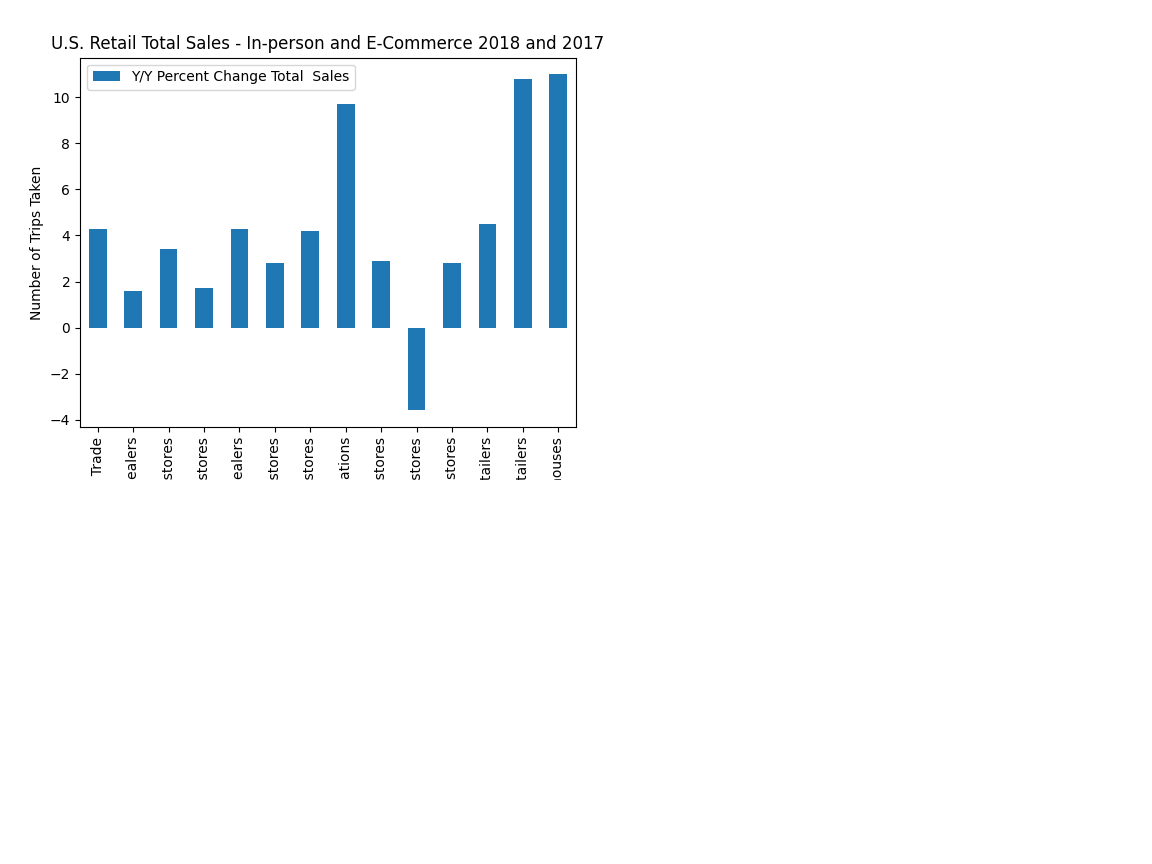

NameError: name 'plot' is not defined

In [28]:
US_perctrev_chart = percent_plot_df.plot(kind="bar", title="U.S. Retail Total Sales - In-person and E-Commerce 2018 and 2017")
US_perctrev_chart.set_xlabel("Gender")
US_perctrev_chart.set_ylabel("Number of Trips Taken")

plot.show()
plot.tight_layout()

In [30]:
# Bar Chart
total_plot_df['2018 Total Sales'] = pd.to_numeric(total_plot_df['2018 Total Sales'])
US_totalrev_chart = total_plot_df.plot(kind="bar", title="U.S. Retail Total Sales - In-person and E-Commerce 2018 and 2017")
gender_chart.set_xlabel("Gender")
gender_chart.set_ylabel("Number of Trips Taken")

plt.show()
plt.tight_layout()

ValueError: Unable to parse string "5,269,468" at position 0

In [ ]:
# Line Chart